# Getting your data

To run any script and to query the API in general, you will need a token. A code is generated every time you install the facebook.tracking.exposed

You can use the test one or enter you own. Read this if you don't know how to get your token: link.

In [1]:
token = "7228023a4f05a28d9345a3d86a1814cdc0e1a218"
print("Your token: "+token)

Your token: 7228023a4f05a28d9345a3d86a1814cdc0e1a218


Import the necessary libraries. In this example we commented out the hierarchical configuration used to call scripts from the command line.

In [2]:
import pandas as pd
from src.lib import API, tools
# from src.lib.config import config
import datetime

print('Done!')

Done!


Now you can call the dataframe with `API.getDf()`. You need to specify `amount` and `skip`. This will determine the amount of entries you will get (each of them is a single post) and how many you are skipping. Defaults are `400` and `0`.

In [3]:
amount = 1000
skip = 0

df = API.getDf(token, 'summary', amount, skip)
print('Done!')

Done!


This is how the data looks like:

In [25]:
from IPython.display import display

display(df)

,ANGRY,HAHA,LIKE,LOVE,SAD,WOW,displaySource,fblinktype,id,images,...,publicationTime,semanticCount,semanticId,source,sourceLink,texts,textsize,timeline,user,videoautoplay
impressionTime,,,,,,,,,,,,,,,,,,,,,
2019-05-10 13:05:27+00:00,0.0,23.0,226.0,39.0,0.0,0.0,El País,posts,3d1cc846a7c4f9c2beca5adf68f820640600b407,"{'count': 1, 'captions': []}",...,2019-05-10T11:06:00.000Z,"{'personal': 0, 'global': 0}",2ad122928382d7d9c9842b46d57e5370f5ca46c7,El País,https://www.facebook.com/elpais/,[El rechazo a la independencia de Cataluña aum...,302,endive-tea-okra,rosemary-ceviche-meringue,
2019-05-10 13:05:27+00:00,14.0,0.0,31.0,0.0,0.0,8.0,El País,posts,f9645faaaee715032b8dba86cf13210ca03aa3cc,"{'count': 1, 'captions': []}",...,2019-05-09T18:27:00.000Z,"{'personal': 0, 'global': 3}",e139f65a9e026d89b69ac6a436dc4675fbdf4ebc,El País,https://www.facebook.com/elpais/,"[Según EE UU, el barco incautado servía para e...",292,endive-tea-okra,rosemary-ceviche-meringue,
2019-05-10 13:05:28+00:00,42.0,0.0,25.0,4.0,0.0,0.0,ABC.es era in diretta.,videos,e9922a0aeb43abdf341a51303d73a16e3c37d3ce,"{'count': 3, 'captions': []}",...,2019-05-10T11:31:31.000Z,"{'personal': 0, 'global': 0}",c14f56ea3077289a9f94b44b4227c08a8f25862c,ABC.es,https://www.facebook.com/ABCes/,[🔵 Sigue en directo el Consejo de Ministros],42,endive-tea-okra,rosemary-ceviche-meringue,False
2019-05-10 13:05:28+00:00,0.0,0.0,5.0,1.0,0.0,4.0,Diario Público ha condiviso un link.,posts,05563e1a065c1c2a2ffda3f03f4aba74092dd736,"{'count': 1, 'captions': []}",...,2019-05-10T01:30:00.000Z,"{'personal': 0, 'global': 0}",c39c8595eaac3cb1b9d22ed31b1cae5e6e601fab,Diario Público,https://www.facebook.com/diario.publico/,[La Fiscalía recurre la absolución de Rosell y...,337,endive-tea-okra,rosemary-ceviche-meringue,
2019-05-10 13:05:47+00:00,0.0,2.0,7.0,0.0,0.0,4.0,eldiario.es,posts,023060c46ed9a71e570e4cda9ee38c2aac5951ac,"{'count': 1, 'captions': []}",...,2019-05-08T19:20:00.000Z,"{'personal': 0, 'global': 1}",de077c23798d5c9ac7fdc5695922c4956edc9aa1,eldiario.es,https://www.facebook.com/eldiarioes/,[¿Podrían las aseguradoras predecir accidentes...,464,endive-tea-okra,rosemary-ceviche-meringue,
2019-05-10 13:05:48+00:00,45.0,0.0,69.0,0.0,0.0,40.0,La Vanguardia,posts,ad7c63f152c79b2b1f96fb05d1fb333e65ced7ef,"{'count': 1, 'captions': []}",...,2019-05-07T19:10:00.000Z,"{'personal': 0, 'global': 2}",521d094e0604f344d22a16ebb814c4ae76194e9a,La Vanguardia,https://www.facebook.com/LaVanguardia/,[La usuaria grabó el trayecto y llamó a la Pol...,364,endive-tea-okra,rosemary-ceviche-meringue,
2019-05-10 13:05:48+00:00,0.0,11.0,35.0,0.0,0.0,8.0,El País,posts,931efba1a9c3790645d4e0e572539d2f150e8dc4,"{'count': 1, 'captions': []}",...,2019-05-10T04:16:04.000Z,"{'personal': 0, 'global': 3}",01b1297521a1d25011ecc1c3ea0db7c7a6e3f11a,El País,https://www.facebook.com/elpais/,[La guerra comercial que Estados Unidos libra ...,392,endive-tea-okra,rosemary-ceviche-meringue,
2019-05-10 13:05:48+00:00,0.0,0.0,5.0,0.0,6.0,5.0,Catalunya Diari,posts,7020cf5b4be4a200ede2754e11e4a325d571ba65,"{'count': 1, 'captions': []}",...,2019-05-09T20:00:01.000Z,"{'personal': 0, 'global': 1}",c7a3c5dacd0154ba2f68756a5d5aea611c99b921,Catalunya Diari,https://www.facebook.com/CatalunyaDiari/,"[🔥 ATENCIÓ!, 🔥 attenzione!, ÚLTIMA HORA: Espec...",196,endive-tea-okra,rosemary-ceviche-meringue,
2019-05-10 13:05:49+00:00,703.0,74.0,60.0,0.0,0.0,0.0,ABC.es,posts,7df93723c9b0764b3f535846e589c72315bc672c,"{'count': 1, 'captions': []}",...,2019-05-10T10:24:09.000Z,"{'personal': 0, 'global': 1}",7be4ff31860f34ab3b28be0ae10211558f3a47b0,ABC.es,https://www.facebook.com/ABCes/,[🔴 #ÚLTIMAHORA Congreso y Senado abonarán est...,532,endive-tea-okra,rosemary-ceviche-meringue,


You can also download the data using:

```
df.to_csv('your_file')
```

## Manipulating dates

Now you can check the timeframe of the data you pulled.

In [5]:

df = tools.setDatetimeIndex(df)
maxDate = str(df.index.max())[:-6]
minDate = str(df.index.min())[:-6]
print('Information for timeframe: '+minDate+' to '+maxDate)

Information for timeframe: 2019-05-09 11:06:44 to 2019-05-11 10:06:51


If you need, you can also cut it to get, in this example, the last 24 hours only.

In [6]:
start = datetime.datetime.today()-datetime.timedelta(days=1)
end = datetime.datetime.today()
df = tools.setTimeframe(df, str(start), str(end))
print('From '+str(start)+' to '+str(end)+'\n')


From 2019-05-10 13:05:14.457741 to 2019-05-11 13:05:14.457784



## Your stats

You can get useful insights for yourself, for example you can estimate the you time spent of facebook during that timeframe.

In [7]:
timelines = df.timeline.unique()
total = pd.to_timedelta(0)

for t in timelines:
    ndf = tools.filter(t, df=df, what='timeline', kind='or')
    timespent = ndf.index.max() - ndf.index.min()
    total += timespent
    
print('Total time spent on Facebook: '+str(total))

Total time spent on Facebook: 0 days 00:21:01


Or the time spent watching ads.

In [8]:
nature = df.nature.value_counts()

try:
    percentage = str((nature.sponsored/nature.organic)*100)[:-12]
except:
    nature['sponsored'] = 0
    percentage = str((nature.sponsored/nature.organic)*100)
    
print(percentage+'% of the posts are sponsored posts.')

timeads = (total.seconds)*(nature.sponsored/nature.organic)
print('You spent an estimate of '+str(datetime.timedelta(seconds=(timeads)))[:-7]+' watching ads on Facebook.')

0.0% of the posts are sponsored posts.
You spent an estimate of  watching ads on Facebook.


You can also check which are the top news that are informing you.

In [9]:
n = 5
top = df.source.value_counts().nlargest(n)
print('Top '+str(n)+' sources of information are: \n'+top.to_string())

Top 5 sources of information are: 
La Vanguardia     82
El País           73
eldiario.es       67
Diario Público    67
ABC.es            66


Of course, you can display this data graphically.

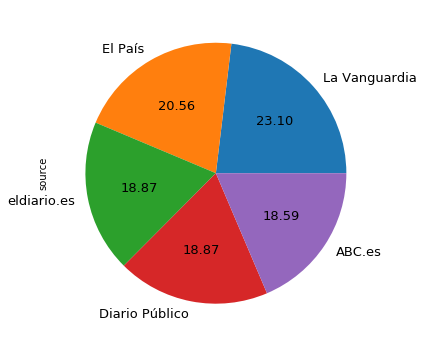

In [12]:
top.plot.pie(autopct='%.2f', fontsize=13, figsize=(6, 6))

## Experimenting with altair viz tools

Getting all posts with link

In [1]:
import altair as alt
from vega_datasets import data

# for the notebook only (not for JupyterLab) run this command once per session
alt.renderers.enable('notebook')

alt.Chart(df).mark_point().encode(
    x='impressionTime',
    y='LIKE',
    color='source'
).interactive()

NameError: name 'df' is not defined

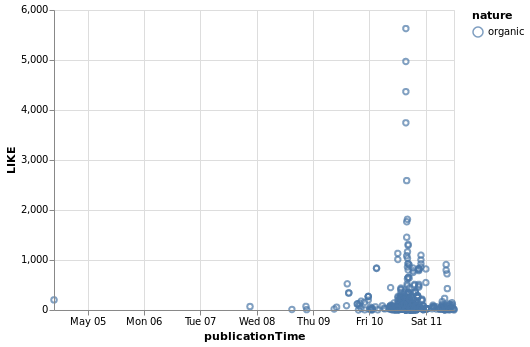

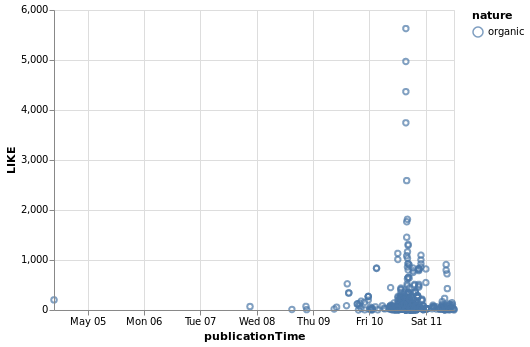

In [32]:
alt.Chart(df).transform_calculate(
    url='https://www.facebook.com' + alt.datum.permaLink
).mark_point().encode(
    x='publicationTime:T',
    y='LIKE:Q',
    color='nature:N',
    href='url:N',
    tooltip=['source:N', 'url:N']
)
